# Logistic Regression

This notebook makes use of logistic regression to predict whether one should wear a coat outside based on 1 feature (temperature).  
An output of 1 means coat should be put on, and output of 0 means a coat is not needed.  
Uses logistic loss function as cost.  
Initializes weight and bias using numpy randn function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialize result, temperature, wind speed, and cloud coverage arrays
put_coat_on = np.array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0])                # coat = 1 ; no coat = 0
temperature = np.array([65, 12, 71, 68, 88, 54, 62, 13, 44, 72, 26, 59])    # Degrees in F

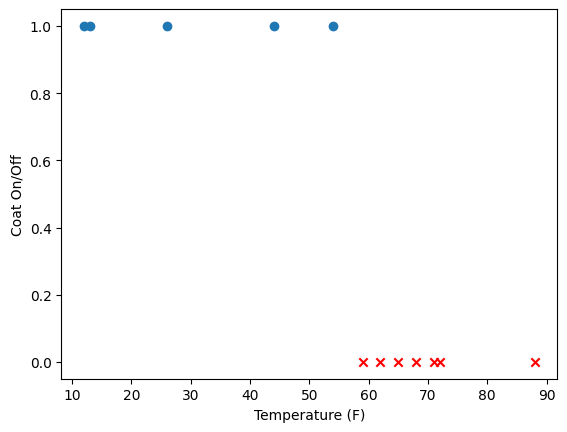

In [3]:
# Graph of temperature and coat classification
coat_on_temp = temperature[put_coat_on == 1]
coat_off_temp = temperature[put_coat_on == 0]
plt.scatter(coat_on_temp, put_coat_on[put_coat_on == 1])
plt.scatter(coat_off_temp, put_coat_on[put_coat_on == 0], color='r', marker='x')
plt.xlabel("Temperature (F)")
plt.ylabel("Coat On/Off")
plt.show()

In [4]:
# Scale variables down using using min-max scaling
temp_scaled = np.array([(i-np.min(temperature))/(np.max(temperature)-np.min(temperature)) for i in temperature])

In [5]:
# define number of training examples
n = len(temp_scaled)

In [6]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Final Cost: 0.24957892257630457
Final Weight: -62.84151310504059
Final Bias: 36.724032839840824


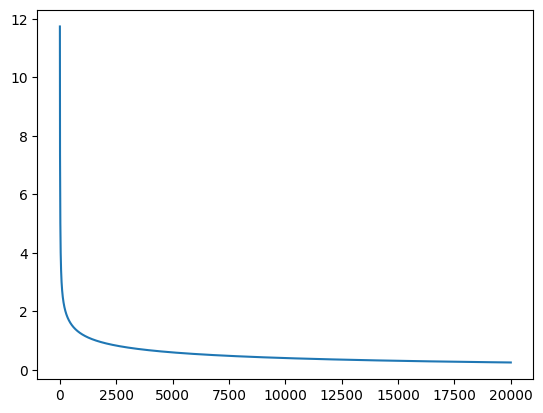

In [7]:
# Initialize weight and bias
weights = np.random.randn()  # random weights for each feature | (1, m)
bias = np.random.randn()         # random biases for each training house

learning_rate = 2.2    # Used learning rate of 2.2
costs = []

for i in range(20000):
    # Calculate ouput using sigmoid function | (np.transpose(features))
    f = sigmoid(np.dot(weights, temp_scaled) + bias)
    
    # Calculate cost at each step using logistic loss
    cost = np.sum(-put_coat_on * np.log(f) - (1-put_coat_on) * np.log(1-f))
    costs.append(cost)

    # Calulate value of derivative of cost with respect to weights and biases | np.transpose(features)
    delta_weights = (1 / n) * np.sum((f - put_coat_on) * temp_scaled)
    delta_bias = (1 / n) * np.sum((f - put_coat_on))

    # Change weights and biases simultaneously according to derivatives and learning rate
    weights = weights - learning_rate * delta_weights
    bias = bias - learning_rate * delta_bias
    
# Plot cost over per iteration
plt.plot(np.linspace(1,len(costs), len(costs)), costs)

print(f"Final Cost: {min(costs)}")
print(f"Final Weight: {weights}")
print(f"Final Bias: {bias}")

In [9]:
# Get price of house based on any square feet
# Uses prediction made from linear regression model
def coat(temp, wind=0.0, cloud=0.0):
    print(f"Temperature: {temp} F")
    
    temp = (temp-np.min(temperature))/(np.max(temperature)-np.min(temperature))
    result = sigmoid(weights*temp + bias)
    
    if result >= 0.5:
        print("\nPut coat on\n")
    elif result < 0.5:
        print("\nNo coat necessary\n")
    
    prob_of_coat = 100 * result
    print(f"Chances of putting on coat: {np.round(prob_of_coat, 4)}%")

coat(70)

Temperature: 70 F

No coat necessary

Chances of putting on coat: 0.0013%


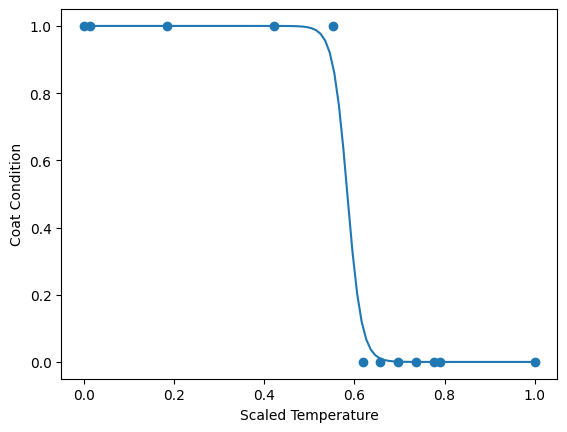

In [11]:
x = np.linspace(np.min(temp_scaled), np.max(temp_scaled), 100)
plt.scatter(temp_scaled, put_coat_on)
plt.plot(x, sigmoid(np.dot(weights, x) + bias))
plt.xlabel("Scaled Temperature")
plt.ylabel("Coat Condition")
plt.show()